In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [54]:
df = pd.read_csv('breast-cancer-data.csv')

In [55]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
df.shape

(569, 32)

In [57]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
# Encoder label diagnosis and store in new target colunm 
# malignant = 1 and benign = 0 

encodered_data = df['diagnosis']
encoder = LabelEncoder()
target_data = encoder.fit_transform(encodered_data)

In [61]:
# Store the encoded column in dataframe and drop the diagnosis column for simplicity
df.drop(['diagnosis'], axis = 1, inplace =True)

In [65]:
# Scale data so that each feature has a single unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [68]:
scaled_data = scaler.transform(df)

In [88]:
# PCA - transform this data to its first 2 principal components.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data = pca.transform(scaled_data)
data.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

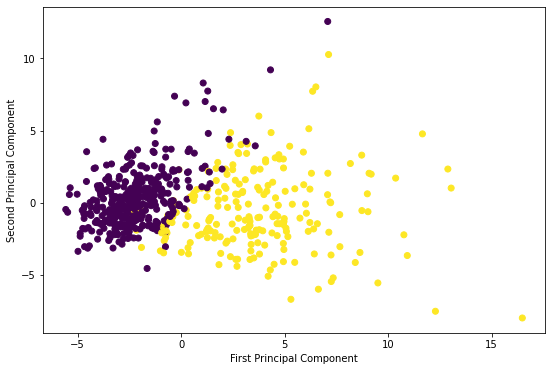

In [92]:
# Plot scatter for the two dimensions 
plt.figure(figsize=(9,6)) # thay doi kthuoc bieu do, 9 width 9 height
plt.scatter(data[:,0],data[:,1],c = target_data,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [94]:
pca.components_

array([[ 0.02291216,  0.21891302,  0.10384388,  0.22753491,  0.22104577,
         0.14241471,  0.2390673 ,  0.25828025,  0.26073811,  0.13797774,
         0.06414779,  0.20611747,  0.01741339,  0.21144652,  0.20307642,
         0.01467821,  0.1702884 ,  0.15354367,  0.18340675,  0.04241552,
         0.10249607,  0.22800935,  0.10451545,  0.23663734,  0.22493214,
         0.12782441,  0.20988456,  0.22860218,  0.2507462 ,  0.12267993,
         0.13156024],
       [-0.03406849, -0.2332714 , -0.0600442 , -0.214589  , -0.23066882,
         0.18642221,  0.15245473,  0.06054163, -0.03416739,  0.19068498,
         0.36653106, -0.1059357 ,  0.08954779, -0.08980704, -0.15277129,
         0.20318988,  0.23250336,  0.19684608,  0.12996518,  0.18355863,
         0.27958414, -0.21929604, -0.04550122, -0.19929599, -0.21898546,
         0.17256296,  0.14425364,  0.09852652, -0.00753437,  0.14261944,
         0.27570208]])

In [95]:
# Explained variance 
pca.explained_variance_ratio_

array([0.42864701, 0.18376792])

In [96]:
# Let's try with 3 Principal Components
pca_3 = PCA(n_components = 3)
pca_3.fit(scaled_data)
data = pca_3.transform(scaled_data)

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. You can visualize this relationship with a heatmap

In [98]:
pca_3.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436])

In [100]:
# Check the accuracy for 2 vs 3 components
from sklearn.model_selection import train_test_split 

In [109]:
X_train,X_test,y_train,y_test = train_test_split(df,target_data,test_size = 0.3,random_state = 100 )

In [110]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [112]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver = 'lbfgs')
lm.fit(X_train, y_train)

LogisticRegression()

In [113]:
lm.score(X_test,y_test)

0.9473684210526315

In [114]:
X_train,X_test,y_train,y_test = train_test_split(df,target_data,test_size = 0.3,random_state = 100 )
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pca_3.transform(X_train)
X_test = pca_3.transform(X_test)
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver = 'lbfgs')
lm.fit(X_train, y_train)
lm.score(X_test,y_test)

0.9532163742690059